**Линейные модели, SVM и деревья решений.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline
sns.set(style="ticks")

In [2]:
df = pd.read_csv('medical_insurance.csv', sep=",")

In [3]:
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
2767   47  female  45.320         1     no  southeast   8569.86180
2768   21  female  34.600         0     no  southwest   2020.17700
2769   19    male  26.030         1    yes  northwest  16450.89470
2770   23    male  18.715         0     no  northwest  21595.38229
2771   54    male  31.600         0     no  southwest   9850.43200

[2772 rows x 7 columns]

In [4]:
df.shape

(2772, 7)

In [5]:
# ищем пропуски
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
categorical_cols=df.select_dtypes(include=object).columns.to_list()
categorical_cols

['sex', 'smoker', 'region']

In [8]:
for cat in categorical_cols:
    print(f"column -- {cat}: {df[cat].unique()}")

column -- sex: ['female' 'male']
column -- smoker: ['yes' 'no']
column -- region: ['southwest' 'southeast' 'northwest' 'northeast']


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
for cat in categorical_cols:
    le = LabelEncoder()
    df[cat] = le.fit_transform(df[cat])

In [11]:
df

age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
2767   47    0  45.320         1       0       2   8569.86180
2768   21    0  34.600         0       0       3   2020.17700
2769   19    1  26.030         1       1       1  16450.89470
2770   23    1  18.715         0       0       1  21595.38229
2771   54    1  31.600         0       0       3   9850.43200

[2772 rows x 7 columns]

In [12]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [13]:
for cat in categorical_cols:
    print(f"column -- {cat}: {df[cat].unique()}")

column -- sex: [0 1]
column -- smoker: [1 0]
column -- region: [3 2 1 0]


In [14]:
X = df.drop('charges', axis=1)  # Замените 'целевая_переменная' на название вашей целевой переменной
y = df['charges']

In [15]:
# разделение на объекты-признаки и целевой признак
'''X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values'''

'X = df.iloc[:, :-1].values\ny = df.iloc[:, -1].values'

In [16]:
# Формирование обучающей и тестовой выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

<Axes: >

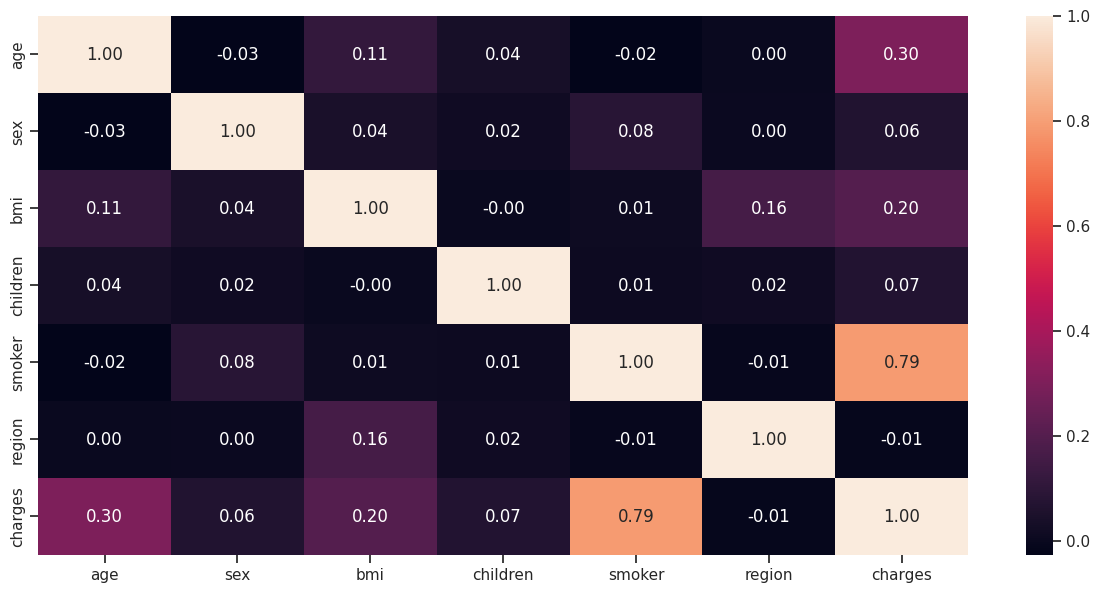

In [17]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(df.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
import pandas as pd


# Scaling the features
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

# Converting the scaled arrays into DataFrames
X_train = pd.DataFrame(X_train_scale, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scale, columns=X_test.columns)

In [20]:
def create_df(data,models, cols):
    index = []
    for model in models:
        model_name = type(model).__name__
        if model_name in index:
            model_name = str(type(model).__name__) + '_hyp'
        index.append(model_name)

    df = pd.DataFrame(data = data,
                     index = index)
    df.rename(columns=dict(zip(df.columns, cols)), inplace=True)
    return df

def training(models, X=X_train, y=y_train):
    metric = {}
    train_model = []
    mses =[]
    maes =[]
    index =[]
    for model in models:
        #score = []  # Initialize score for each model
        model.fit(X, y)
        train_model.append(model)
        y_pred = model.predict(X)
        mse = mean_squared_error(y, y_pred)
        mses.append(mse)
        mae = mean_absolute_error(y, y_pred)
        maes.append(mae)

        #score.extend([mse, mae, r2])  # Use extend to add multiple elements to score

    cols=['train_mse', 'train_mae']
    metric['mse'] = mses
    metric['mae'] = maes
    metric_df = create_df(data=metric,models= train_model, cols = cols)
    return metric_df, train_model

def testing(models,X = X_test, y = y_test):
    mses =[]
    maes =[]
    index =[]
    metric = {}
    for model in models:
        #score = []  # Initialize score for each model
        y_pred = model.predict(X)
        mse = mean_squared_error(y, y_pred)
        mses.append(mse)
        mae = mean_absolute_error(y, y_pred)
        maes.append(mae)
        #score.extend([mse, mae, r2])  # Use extend to add multiple elements to score
    metric['mse'] = mses
    metric['mae'] = maes
    cols=['test_mse', 'test_mae']
    metric_df = create_df(data=metric,models= models, cols=cols)
    return metric_df

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
lr = LinearRegression()
svr = SVR()
nu_svr = NuSVR()
l_svr = LinearSVR()
dtr = DecisionTreeRegressor(random_state=42)

In [22]:
pd.options.display.float_format = '{:.3f}'.format
models = [lr, svr, nu_svr, l_svr, dtr]
training_df, train_models = training(models)

training_df

train_mse  train_mae
LinearRegression       36024723.554   4136.382
SVR                   160158596.886   8287.505
NuSVR                 150596955.951   8430.766
LinearSVR             270812656.312  11296.431
DecisionTreeRegressor     35245.921      5.639

In [23]:
test_df = testing(train_models)

test_df

test_mse  test_mae
LinearRegression       39922479.354  4167.301
SVR                   163569917.515  8297.132
NuSVR                 155674257.450  8476.228
LinearSVR             266120424.066 10776.123
DecisionTreeRegressor   9660467.644   674.434

In [24]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [25]:
model.score(X_test,y_test)

0.7398864322395977

In [26]:
model.score(X_train,y_train)

0.753395406601626

In [27]:
models = [lr, svr, dtr]

In [28]:
for model in models:
    model.fit(X_train,y_train)
    print(f"train model -- {model}:  {model.score(X_train,y_train)}")
    print(f"train model -- {model}:  {model.score(X_test,y_test)}")

train model -- LinearRegression():  0.753395406601626
train model -- LinearRegression():  0.7398864322395977
train model -- SVR():  -0.09635388609299134
train model -- SVR():  -0.06573428081308741
train model -- DecisionTreeRegressor(random_state=42):  0.9997587266398212
train model -- DecisionTreeRegressor(random_state=42):  0.9370575488858102


In [29]:
from IPython.display import Image
from io import StringIO
import pydotplus

In [ ]:
#!pip install pydotplus

In [30]:
def get_png_tree(tree_model_param, feature_names_param):
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param,
                    filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.237761 to fit



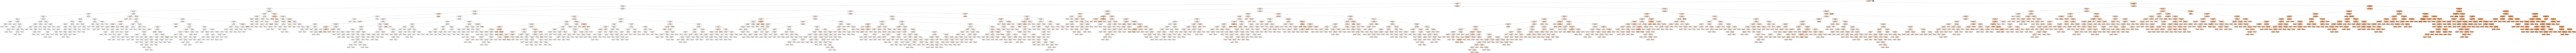

In [31]:
Image(get_png_tree(dtr, X.columns), height='70%')

In [64]:
# Обучим дерево на всех признаках boston c ограничением глубины дерева
short_tree = DecisionTreeRegressor(random_state=42, max_depth=3)
short_tree.fit(X_train, y_train)
short_tree

DecisionTreeRegressor(max_depth=3, random_state=42)

In [58]:
model = DecisionTreeRegressor(random_state=42, max_depth=13)
model.fit(X_train,y_train)
print(f"train model -- {model}:  {model.score(X_train,y_train)}")
print(f"train model -- {model}:  {model.score(X_test,y_test)}")

train model -- DecisionTreeRegressor(max_depth=13, random_state=42):  0.9955580733333849
train model -- DecisionTreeRegressor(max_depth=13, random_state=42):  0.9506082367868638


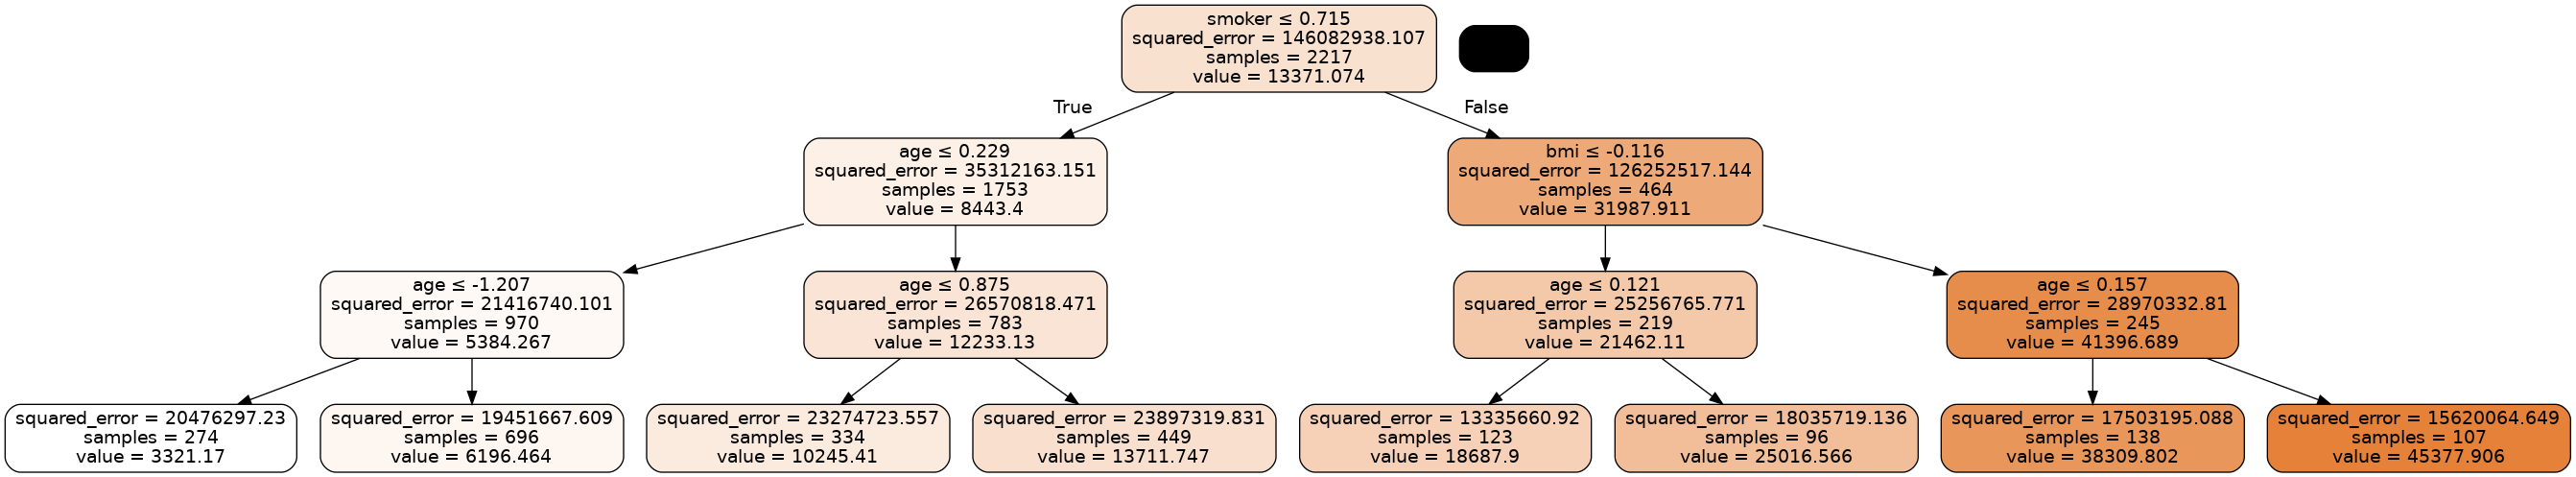

In [66]:
Image(get_png_tree(short_tree, X_train.columns), height='100%')

In [65]:
sum(short_tree.feature_importances_)

1.0

In [36]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

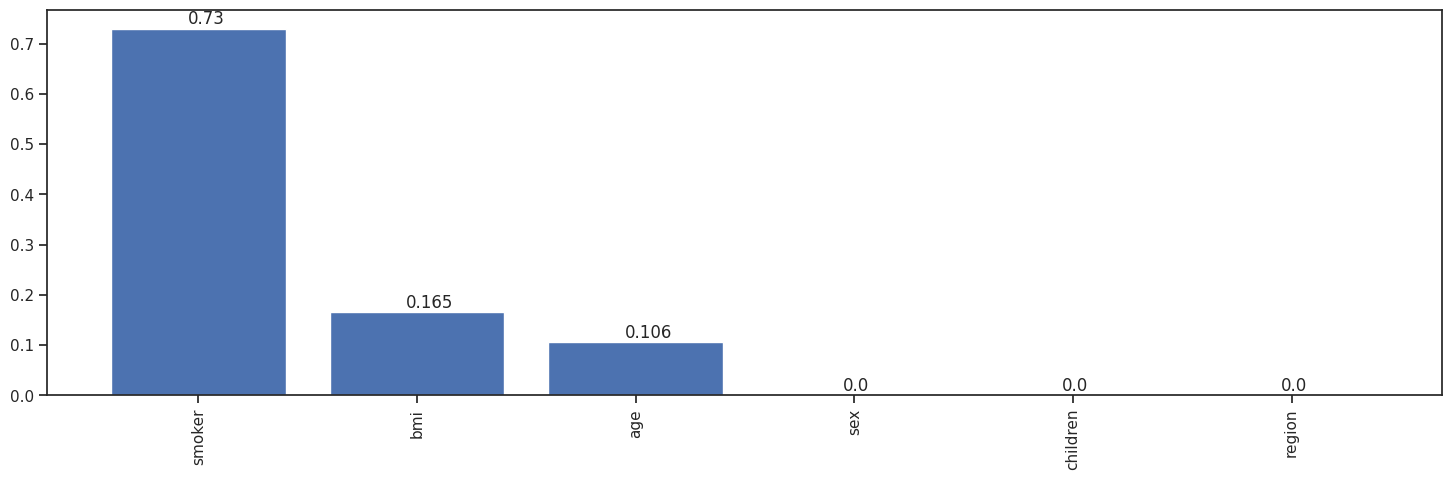

In [37]:
tree_regr_fl, tree_regr_fd = draw_feature_importances(short_tree, df)

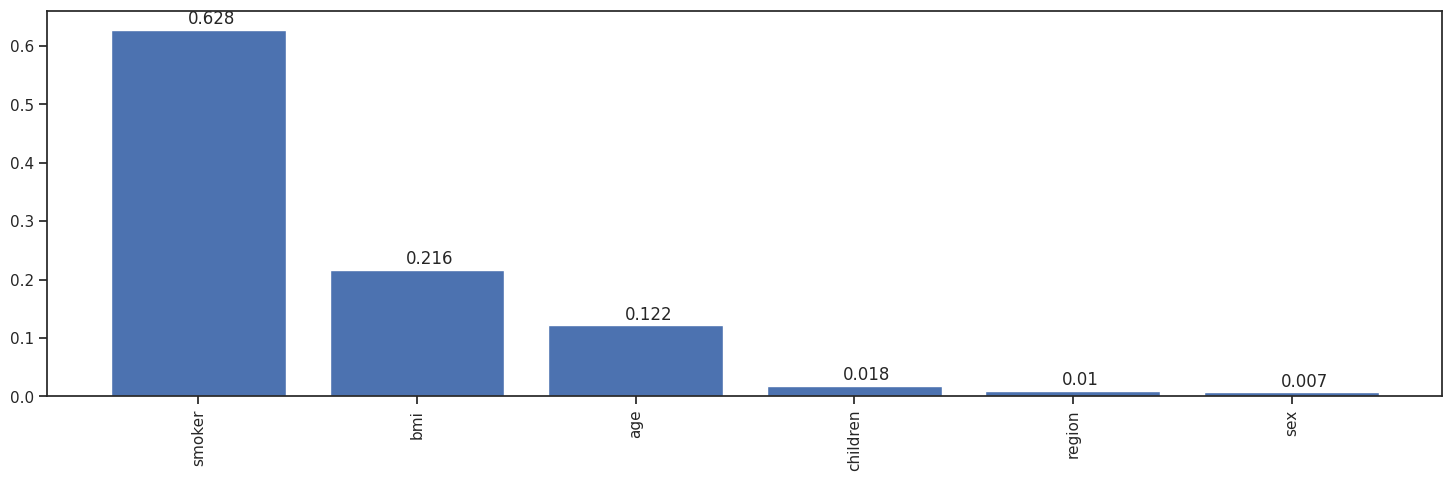

In [38]:
tree_regr_fl, tree_regr_fd = draw_feature_importances(dtr, df)

In [39]:
# Пересортируем признаки на основе важности
df_sorted = df[tree_regr_fl]
df_sorted.head()

smoker    bmi  age  children  region  sex
0       1 27.900   19         0       3    0
1       0 33.770   18         1       2    1
2       0 33.000   28         3       2    1
3       0 22.705   33         0       1    1
4       0 28.880   32         0       1    1

In [40]:
# Формирование обучающей и тестовой выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [41]:
# Scaling the features
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

# Converting the scaled arrays into DataFrames
X_train = pd.DataFrame(X_train_scale, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scale, columns=X_test.columns)

In [ ]:
#boston_tree_regr_fl[0:5]

In [42]:
def create_df(data,models, cols):
    index = []
    for model in models:
        model_name = type(model).__name__
        if model_name in index:
            model_name = str(type(model).__name__) + '_hyp'
        index.append(model_name)

    df = pd.DataFrame(data = data,
                     index = index)
    df.rename(columns=dict(zip(df.columns, cols)), inplace=True)
    return df

def training(models, X=X_train, y=y_train):
    metric = {}
    train_model = []
    mses =[]
    maes =[]
    index =[]
    for model in models:
        #score = []  # Initialize score for each model
        model.fit(X, y)
        train_model.append(model)
        y_pred = model.predict(X)
        mse = mean_squared_error(y, y_pred)
        mses.append(mse)
        mae = mean_absolute_error(y, y_pred)
        maes.append(mae)

        #score.extend([mse, mae, r2])  # Use extend to add multiple elements to score

    cols=['train_mse', 'train_mae']
    metric['mse'] = mses
    metric['mae'] = maes
    metric_df = create_df(data=metric,models= train_model, cols = cols)
    return metric_df, train_model

def testing(models,X = X_test, y = y_test):
    mses =[]
    maes =[]
    index =[]
    metric = {}
    for model in models:
        #score = []  # Initialize score for each model
        y_pred = model.predict(X)
        mse = mean_squared_error(y, y_pred)
        mses.append(mse)
        mae = mean_absolute_error(y, y_pred)
        maes.append(mae)
        #score.extend([mse, mae, r2])  # Use extend to add multiple elements to score
    metric['mse'] = mses
    metric['mae'] = maes
    cols=['test_mse', 'test_mae']
    metric_df = create_df(data=metric,models= models, cols=cols)
    return metric_df

In [43]:
for i in range(2, 7):
    print(i)
    pd.options.display.float_format = '{:.3f}'.format
    models = [lr, svr, nu_svr, l_svr, dtr]
    training_df, train_models = training(models, X_train[tree_regr_fl[0:i]])

    print(training_df)
    test_df = testing(train_models, X_test[tree_regr_fl[0:i]])

    print(test_df)

2
                          train_mse  train_mae
LinearRegression       49059356.397   5351.355
SVR                   157594076.894   8264.909
NuSVR                 149067261.886   8360.161
LinearSVR             273532810.667  11437.626
DecisionTreeRegressor  16478625.531   2412.935
                           test_mse  test_mae
LinearRegression       55784083.121  5677.046
SVR                   161399671.497  8288.616
NuSVR                 154296455.547  8420.935
LinearSVR             269036873.409 10923.853
DecisionTreeRegressor  30984927.512  3655.173
3
                          train_mse  train_mae
LinearRegression       36503821.826   4180.217
SVR                   158408724.268   8174.710
NuSVR                 149064776.911   8371.329
LinearSVR             270955529.804  11320.017
DecisionTreeRegressor    501813.085     70.028
                           test_mse  test_mae
LinearRegression       40752860.565  4236.645
SVR                   161986397.117  8189.118
NuSVR             

In [68]:
from IPython.core.display import HTML
from sklearn.tree import export_text
tree_rules = export_text(dtr, feature_names=list(X_train.columns))
HTML('<pre>' + tree_rules + '</pre>')